In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head(5)

In [ ]:
df.shape

In [ ]:
# Project Pipeline

#1. Data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements 
#7. Deployment


1. Data Cleaning

In [ ]:
df.info()

In [ ]:
# Dropping columns with null values

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
df.head(4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Target']=le.fit_transform(df['Target'])
# SPAM- 0
# HAM - 1

In [ ]:
df.head(4)

In [ ]:
df.duplicated().sum()

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df.sample(5)

2. EDA

In [ ]:
df['Target'].value_counts()

In [ ]:
# SPAM - 653
# HAM - 4516

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.pie(df['Target'].value_counts(), labels=['HAM','SPAM'],autopct="%0.2f",wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1.5, 
                      'antialiased': True})
plt.title("Piechart showing Spam and Ham percentages")
plt.show()

In [ ]:
import tensorflow as tf
import tensorflow_text as tft
import seaborn as sns

In [ ]:
df['char']=df['Text'].apply(len)

In [ ]:
#number of words
wt=tft.WhitespaceTokenizer()

In [ ]:
df['num_of_words']=df['Text'].apply(lambda x:len(wt.tokenize(x)))

In [ ]:
df.head(5)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head(5)

In [ ]:
df[['char','num_of_words','num_sentences']].describe()

In [ ]:
#HAM
df[df['Target']==0][['char','num_of_words','num_sentences']].describe()

In [ ]:
#SPAM
df[df['Target']==1][['char','num_of_words','num_sentences']].describe()

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['Target']==0]['char'])
sns.histplot(df[df['Target']==1]['char'],color='green')

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['Target']==0]['num_of_words'])
sns.histplot(df[df['Target']==1]['num_of_words'],color='red')

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'],color='red')

In [ ]:
sns.pairplot(df,hue='Target')

In [ ]:
# To analyze correlation
sns.heatmap(df.corr(),annot=True)

We can see correlation between characters and Target

3. Data Preprocessing 

In [ ]:
def text_preprocess(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(p.stem(i))
        
    return " ".join(y)      

In [ ]:
df['Text'][4]

In [ ]:
text_preprocess("Nah I don't think he goes to usf, he lives around here though")

In [ ]:
df['preprocessed_Txt']=df['Text'].apply(text_preprocess)

In [ ]:
df.head(5)

In [ ]:
#Generating Wordcloud for ham and spam

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
w=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
sw=w.generate(df[df['Target']==1]['preprocessed_Txt'].str.cat(sep=" "))

In [ ]:
plt.imshow(sw)

In [ ]:
hw=w.generate(df[df['Target']==0]['preprocessed_Txt'].str.cat(sep=" "))
plt.imshow(hw)

In [ ]:
spam_corpus=[]
for i in df[df['Target']==1]['preprocessed_Txt'].tolist():
    for j in i.split():
        spam_corpus.append(j)

In [ ]:
len(spam_corpus)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new')])

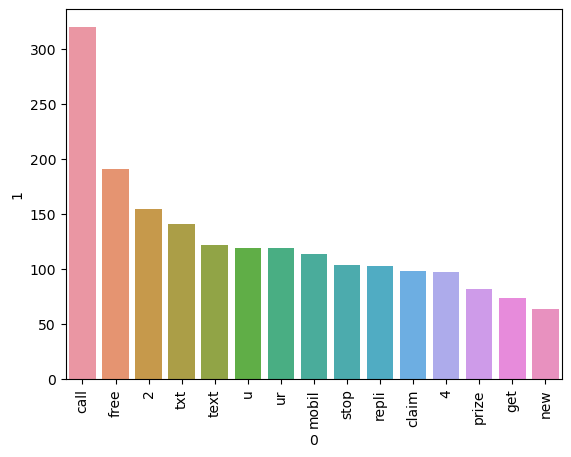

In [239]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(15))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(15))[1])
plt.xticks(rotation='vertical')

4.Model Building

In [262]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [263]:
X=tfidf.fit_transform(df['preprocessed_Txt']).toarray()

In [264]:
X.shape

(5169, 6708)

In [265]:
y=df['Target'].values

In [266]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [267]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=23)

In [268]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix

In [269]:
gn=GaussianNB()
mn=MultinomialNB()
bn=BernoulliNB()

In [270]:
gn.fit(X_train,Y_train)
Y_pred=gn.predict(X_test)

In [271]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       916
           1       0.47      0.86      0.60       118

    accuracy                           0.87      1034
   macro avg       0.72      0.87      0.76      1034
weighted avg       0.92      0.87      0.89      1034



In [272]:
print(confusion_matrix(Y_test,Y_pred))

[[801 115]
 [ 17 101]]


In [273]:
bn.fit(X_train,Y_train)
Y_pred=bn.predict(X_test)

In [274]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       916
           1       0.99      0.81      0.89       118

    accuracy                           0.98      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.98      0.98      0.98      1034



In [275]:
mn.fit(X_train,Y_train)
Y_pred=mn.predict(X_test)

In [276]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       916
           1       1.00      0.69      0.82       118

    accuracy                           0.97      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.97      0.97      0.96      1034



Bernoulli NBor multinomialNB are giving best accuracy

In [278]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.6 MB/s eta 0:00:00


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [280]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [281]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [286]:
from sklearn.metrics import accuracy_score,precision_score

In [287]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [288]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9748549323017408, 0.9693877551020408)

In [290]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9693877551020408
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  1.0
For  DT
Accuracy -  0.9410058027079303
Precision -  0.7663551401869159
For  LR
Accuracy -  0.9545454545454546
Precision -  0.8901098901098901
For  RF
Accuracy -  0.9777562862669246
Precision -  1.0
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.8962264150943396
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8508771929824561
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.98
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.9010989010989011
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9320388349514563


In [291]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [292]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [293]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.910058
1,NB,Accuracy,0.965184
2,RF,Accuracy,0.977756
3,ETC,Accuracy,0.978723
4,SVC,Accuracy,0.974855
5,xgb,Accuracy,0.971954
6,GBDT,Accuracy,0.956480
7,AdaBoost,Accuracy,0.967118
8,LR,Accuracy,0.954545
9,BgC,Accuracy,0.963250


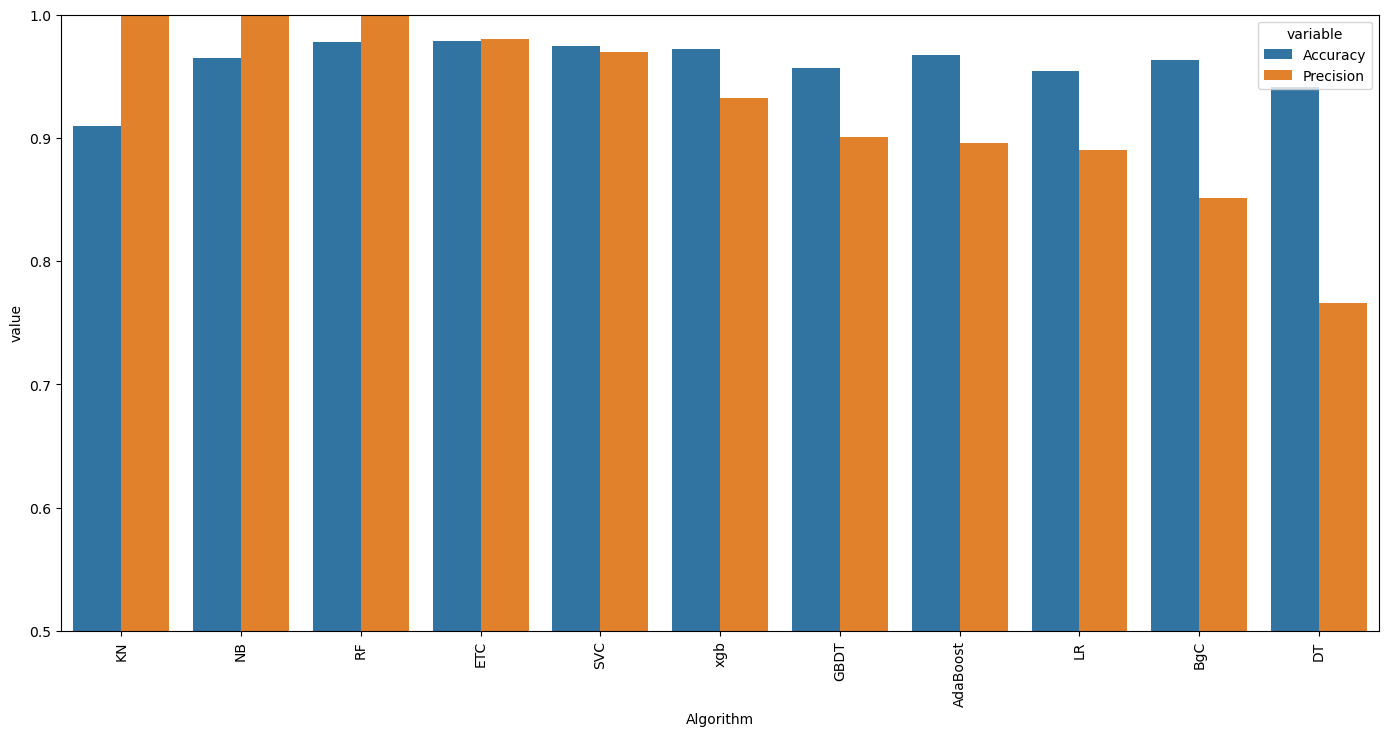

In [300]:
plt.figure(figsize=(17,8))
sns.barplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Improving Model Performance

In [301]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [302]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [303]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [304]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [305]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [306]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.910058,1.000000,0.910058,1.000000,0.910058,1.000000,0.910058,1.000000
1,NB,0.965184,1.000000,0.965184,1.000000,0.965184,1.000000,0.965184,1.000000
2,RF,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,ETC,0.978723,0.980000,0.978723,0.980000,0.978723,0.980000,0.978723,0.980000
4,SVC,0.974855,0.969388,0.974855,0.969388,0.974855,0.969388,0.974855,0.969388
5,xgb,0.971954,0.932039,0.971954,0.932039,0.971954,0.932039,0.971954,0.932039
6,GBDT,0.956480,0.901099,0.956480,0.901099,0.956480,0.901099,0.956480,0.901099
7,AdaBoost,0.967118,0.896226,0.967118,0.896226,0.967118,0.896226,0.967118,0.896226
8,LR,0.954545,0.890110,0.954545,0.890110,0.954545,0.890110,0.954545,0.890110
9,BgC,0.963250,0.850877,0.963250,0.850877,0.963250,0.850877,0.963250,0.850877


In [307]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [308]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [312]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [313]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9874274661508704
Precision 1.0


Model Accuracy is improved

In [315]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mn,open('model.pkl','wb'))